<a href="https://colab.research.google.com/github/gonzalezzayra/EDP-II/blob/main/M%C3%A9todo_de_colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de colocación para EDO**

$$\frac{d^2 u}{d x^2} + u = x$$

$$u(0) = 0  $$
$$u'(0) = 2$$

Resolviendo por el método

$$u_N = \alpha_0 + \alpha_1  x + \alpha_2  x^2 +\alpha_3 x^3 + ... $$

i) Elige $α_0$ y $α_1$ para sastifacer las condiciones

ii) Define $ϵ = u_N^{''} + u_N -x$ y busca $ϵ$ en este caso

Usar $x= 1/2$ y x = $1$

In [369]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Analíticamente:

In [370]:
x = sp.Symbol('x') #Introducimos una variable
u = sp.Function('u') #Esto es una función
#A u todavía no le decimos de quién es función

In [371]:
x #Para ver como se imprime

x

In [372]:
u #Para ver como se imprime

u

Para resolver la ecuación

$$\frac{d^2 u}{d x^2} + u - x = 0$$

In [373]:
#Introducimos la ecuación diferencial ordinaria
ode = u(x).diff(x,x) + u(x) -x
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [374]:
sol = sp.dsolve(ode, ics = {u(0): 0, u(x).diff(x,1).subs(x,0): 2 })
#ics es un diccionario

In [375]:
sol #Se imprime la solución

Eq(u(x), x + sin(x))

Gráfica

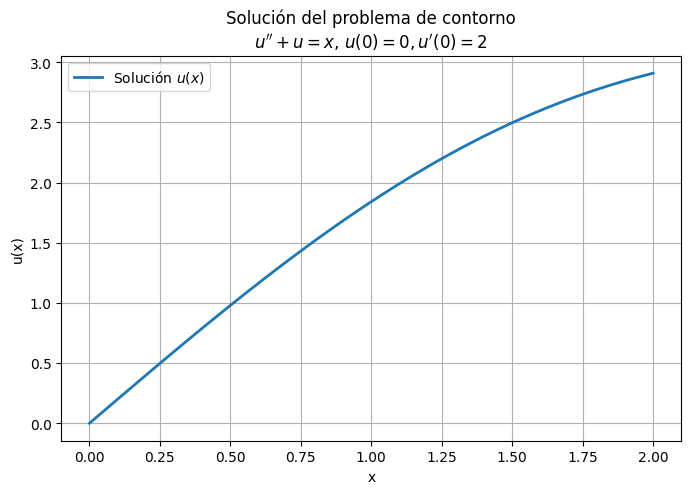

In [376]:
#Convertimos en un arreglo de numpy
U_exp = sol.rhs

u_num = sp.lambdify(x, U_exp, "numpy") #Cambiar a una función


xx = np.linspace(0,2,100)
yy = u_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx,yy, label = 'Solución $u(x)$', linewidth = 2)
plt.title("Solución del problema de contorno\n$u'' + u = x$, $u(0) = 0, u'(0) = 2$")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

Ahora con las funciones de prueba

In [377]:
a, b = sp.symbols('a b')

#Función de prueba u_n(x) que cumple u(0) =0, u'(0) = 2

u_n = 2*x + a*x**2 + b*x**3 #alpha_0 =0 y alpha_1 = 2

In [378]:
u_n

a*x**2 + b*x**3 + 2*x

In [379]:
u_n_2 = sp.diff(u_n, x, 2)#deriva respecto a x, dos veces

E = u_n_2 + u_n

#Lo había puesto así, pero a y b me dan 0
#E = u_n_2 + u_n - x#Siguiendo lo que nos pusó en el problema

In [380]:
E

a*x**2 + b*x**3 + 2*x + 2*(a + 3*b*x)

$$E = F(u_N) - f(x) = \frac{d^2 u_N}{dx^2} + u_n - x$$

Esto se podía agregar, pero es tan necesario, aparte de que no me funcionó:

In [ ]:
#sp.integrate(E,x)
#E(a,b,x)
#sp.integrate(E(a,b,x)**, (x,0,1))

Agregar los puntos de colocación

In [381]:
#Puntos de colocación 0.5 y 1

points = [sp.Rational(1,2), sp.Rational(1,1)]

In [382]:
points

[1/2, 1]

In [383]:
eqs = [sp.Eq(E.subs(x,p), p) for p in points]

#Resolver para a y b
sol_1 = sp.solve(eqs, [a,b])

In [384]:
for eq in eqs:
  print(eq)

Eq(9*a/4 + 25*b/8 + 1, 1/2)
Eq(3*a + 7*b + 2, 1)


In [385]:
print("Sistema de ecuaciones simbolico")

for eq in eqs:
  sp.pprint(eq)

Sistema de ecuaciones simbolico
9⋅a   25⋅b          
─── + ──── + 1 = 1/2
 4     8            
3⋅a + 7⋅b + 2 = 1


In [386]:
sol_1

{a: -1/17, b: -2/17}

In [387]:
#Sustituir en la función de prueba

u_approx = u_n.subs(sol_1)

In [388]:
u_approx

-2*x**3/17 - x**2/17 + 2*x

In [389]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

Gráfica

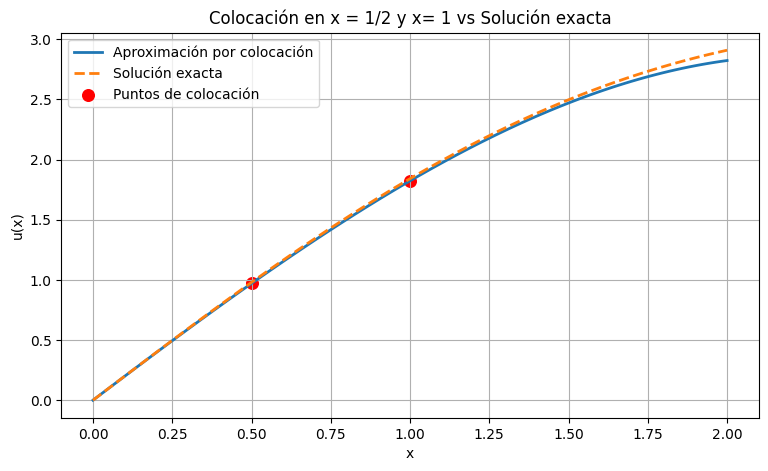

In [390]:
#Solución analítica y numérica
xx = np.linspace(0,2,100)

plt.figure(figsize=(9,5))
plt.plot(xx, u_approx_fn(xx), label = 'Aproximación por colocación', linewidth = 2)
plt.plot(xx, yy, "--",  label = 'Solución exacta', linewidth = 2)

#puntos de colocación

plt.scatter([0.5,1], u_approx_fn(np.array([0.5,1])),
            color = "red", s=70, label = "Puntos de colocación")

plt.title("Colocación en x = 1/2 y x= 1 vs Solución exacta")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

Calcule el error de la aproximación numérica

In [391]:
#Evaluar la aproximación en los puntos xx
yy_approx = u_approx_fn(xx)

#Calcular el error absoluto: exacta - aproximación
error_abs = np.abs(yy - yy_approx)

#Obtenemos el error máximo
error_max = np.max(error_abs)

print("Error absoluto", error_abs)
print("Error mmáximo de la aproximación:", error_max)

Error absoluto [0.00000000e+00 2.36030213e-05 9.27962271e-05 2.05158858e-04
 3.58276882e-04 5.49746354e-04 7.77176777e-04 1.03819444e-03
 1.33044579e-03 1.65160072e-03 1.99935594e-03 2.37143828e-03
 2.76560799e-03 3.17966200e-03 3.61143726e-03 4.05881393e-03
 4.51971867e-03 4.99212783e-03 5.47407067e-03 5.96363252e-03
 6.45895796e-03 6.95825394e-03 7.45979288e-03 7.96191577e-03
 8.46303519e-03 8.96163837e-03 9.45629016e-03 9.94563601e-03
 1.04284049e-02 1.09034121e-02 1.13695623e-02 1.18258522e-02
 1.22713734e-02 1.27053151e-02 1.31269668e-02 1.35357211e-02
 1.39310761e-02 1.43126381e-02 1.46801243e-02 1.50333648e-02
 1.53723056e-02 1.56970108e-02 1.60076648e-02 1.63045746e-02
 1.65881724e-02 1.68590174e-02 1.71177983e-02 1.73653348e-02
 1.76025805e-02 1.78306242e-02 1.80506920e-02 1.82641494e-02
 1.84725028e-02 1.86774015e-02 1.88806393e-02 1.90841562e-02
 1.92900397e-02 1.95005270e-02 1.97180055e-02 1.99450153e-02
 2.01842494e-02 2.04385559e-02 2.07109388e-02 2.10045591e-02
 2.132273